In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans



In [2]:
df = pd.read_csv('data/company_fundamentals.csv')

In [3]:
features = ['Price', 'Price/Earnings', 'Earnings/Share', 'Market Cap']
df_numeric = df[features]


In [4]:
df_numeric = df_numeric.fillna(df_numeric.mean())

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numeric)


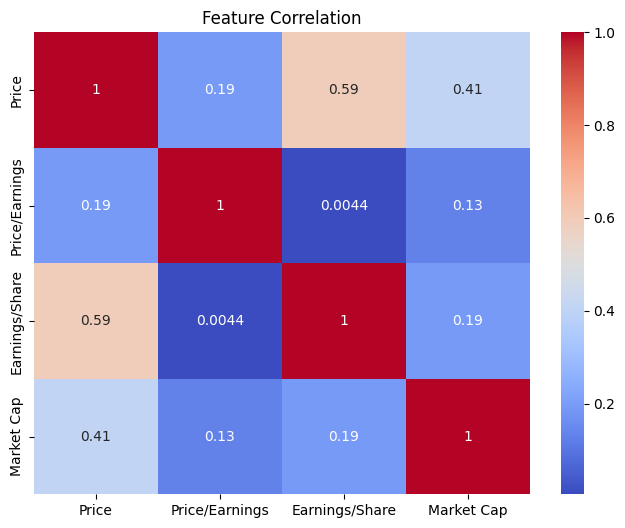

In [6]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()

In [7]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)


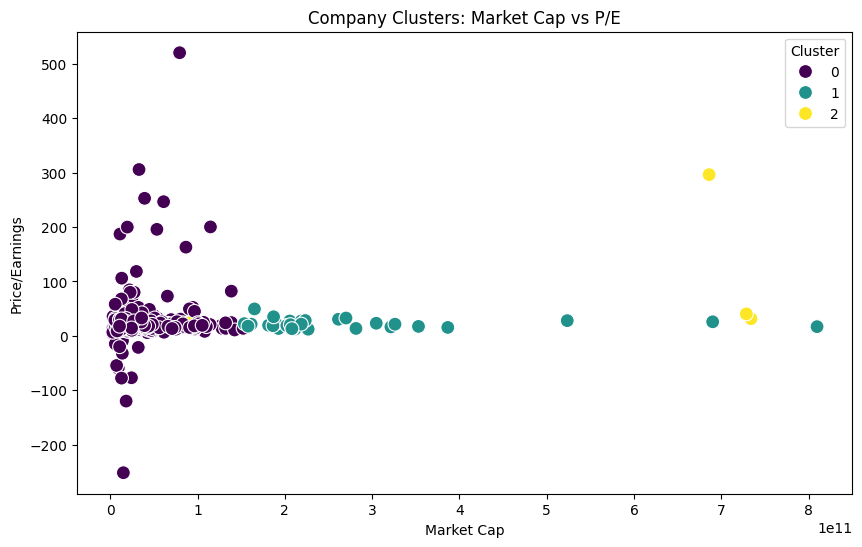

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Market Cap', y='Price/Earnings', hue='Cluster', data=df, palette='viridis', s=100)
plt.title('Company Clusters: Market Cap vs P/E')
plt.show()

In [9]:
joblib.dump(kmeans, 'models/kmeans_model.pkl')
joblib.dump(scaler, 'models/fund_scaler.pkl')
print("Clustering Complete & Model Saved.")

Clustering Complete & Model Saved.
